In [1]:
import os
import sys
sys.path.insert(1,'./src')
import numpy as np
import matplotlib.pyplot as plt
from find_nearest import find_nearest
import h5py
from read_funcs import make_rgb_dc,AOI,read_prs_l2d
from matplotlib_scalebar.scalebar import ScaleBar
from cd_funcs import cva,c2va,diffs
from img_list import use_cases

### Po River PRISMA

The first acquisition is located at Lat,Lon [ 45.1633 , 10.792 ] and the second at Lat,Lon [ 45.165 , 10.7921 ].

In [2]:
#initialization parameterss
use_case='Po_01'
path_l2d = '../DATABASE/'
tstart1=use_cases[use_case][0][0][1]
tend1=use_cases[use_case][0][0][2]
tstart2=use_cases[use_case][0][1][1]
tend2=use_cases[use_case][0][1][2]
name_case_study=use_case

In [3]:
y1, x1, vwl1, swl1, vrf1, srf1, info1 = read_prs_l2d(path_l2d, tstart1, tend1)
y2, x2, vwl2, swl2, vrf2, srf2, info2 = read_prs_l2d(path_l2d, tstart2, tend2)
print("image key 1: "+str(info1['img_id'])+"\nimage key 2: "+str(info2['img_id']))

image key 1: 9409
image key 2: 30245


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


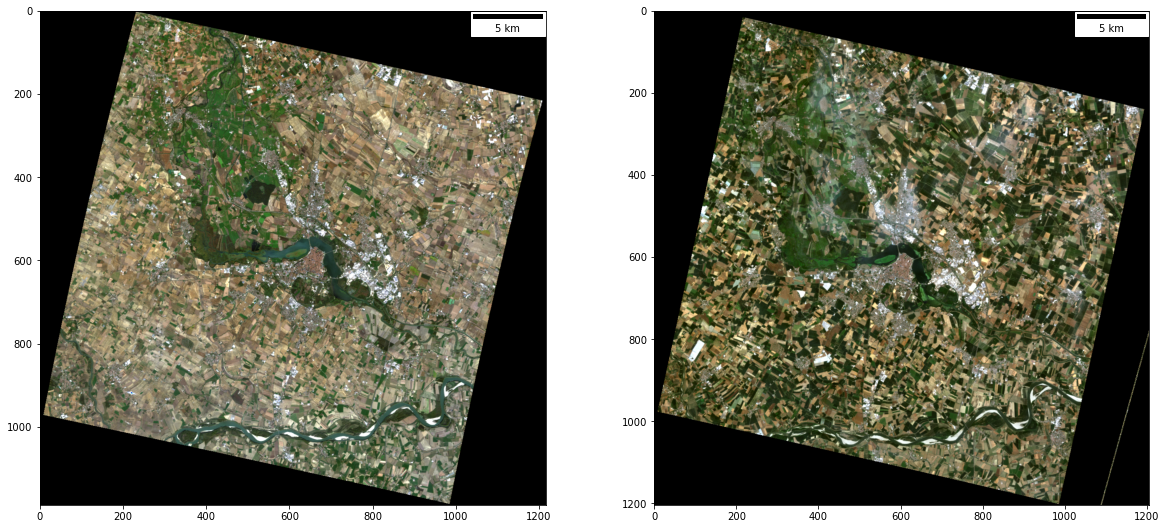

In [4]:
#plot coregistered input data
rgb1 = make_rgb_dc(vrf1,vwl1)
rgb2 = make_rgb_dc(vrf2,vwl1)

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.imshow(rgb1)
scalebar = ScaleBar(30) # 1 pixel = 30 meter
plt.gca().add_artist(scalebar)

plt.subplot(2,2,2)
plt.imshow(rgb2)
scalebar = ScaleBar(30)
plt.gca().add_artist(scalebar)

### Po river Landsat

Short description of use case N° 3

In [16]:
name_case_study='Be_01'

In [17]:
t1 = np.load(path_l2d+'iimg1_'+name_case_study+'.npy')
t2 = np.load(path_l2d+'Im2recalee_'+name_case_study+'.npy')
wl_total = np.load(path_l2d+'wl_total_'+name_case_study+'.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


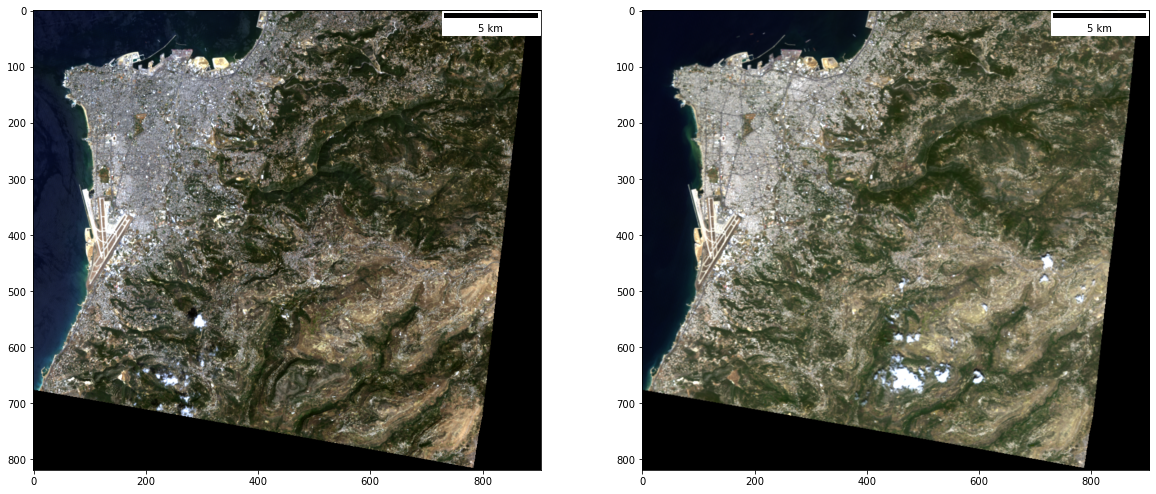

In [18]:
#plot coregistered input data
rgb1 = make_rgb_dc(t1,wl_total)
rgb2 = make_rgb_dc(t2,wl_total)

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.imshow(rgb1)
scalebar = ScaleBar(30) # 1 pixel = 30 meter
plt.gca().add_artist(scalebar)

plt.subplot(2,2,2)
plt.imshow(rgb2)
scalebar = ScaleBar(30)
plt.gca().add_artist(scalebar)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the datacube is now cropped to the new AOI
those are the new sizes:
(135, 300, 230)
(135, 300, 230)


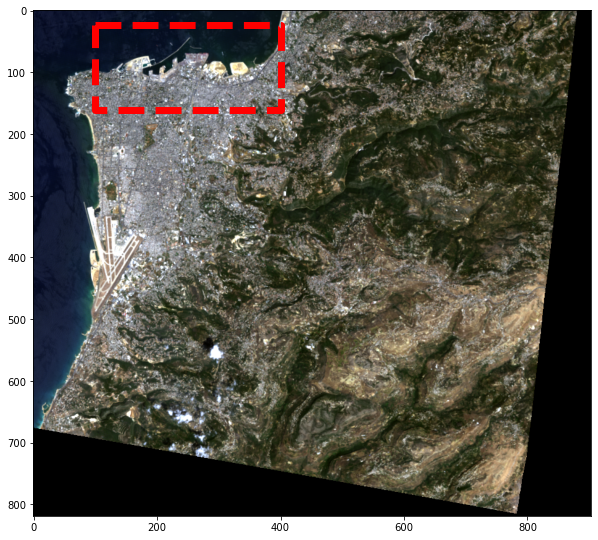

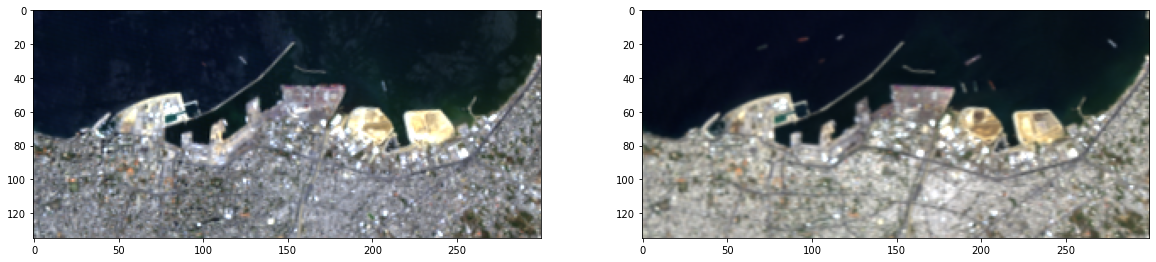

In [19]:
rgb1,rgb2,t1,t2=AOI(t1,t2,wl_total,key=name_case_study,coreg=False)